# Bmad to Astra interface

[PyTao](https://bmad-sim.github.io/pytao/), based on Bmad, can be used to create an Astra lattice. This is a simple example of a FODO lattice in Bmad, converted to Astra

In [1]:
from astra import Astra
from pytao import Tao
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Create Bmad lattice

In [2]:
LAT = """
no_digested
beginning[beta_a] = 10
beginning[beta_b] = 10
beginning[e_tot] = 10e6
parameter[particle] = electron
parameter[geometry] = open

d1: drift, L = 1
d2: d1
qf: quad, L = 0.1, k1 = 1
qd: qf, k1 = -1

fodo: line = (d1, qf, d2, qd)

lat: line = (2*fodo)

use, lat

"""
LATFILE = 'lat.bmad'
with open(LATFILE, 'w') as f:
    f.write(LAT)

In [3]:
tao = Tao(f'-lat {LATFILE} -noplot')
tao.cmd('set particle_start x = 1e-3')

[]

## Astra from Tao

In [4]:
A = Astra.from_tao(tao)
#A.input['output']['zstop'] = 10

A.track1(x0=1e-3, pz0=10e6)

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


<ParticleGroup with 1 particles at 0x135dafac0>

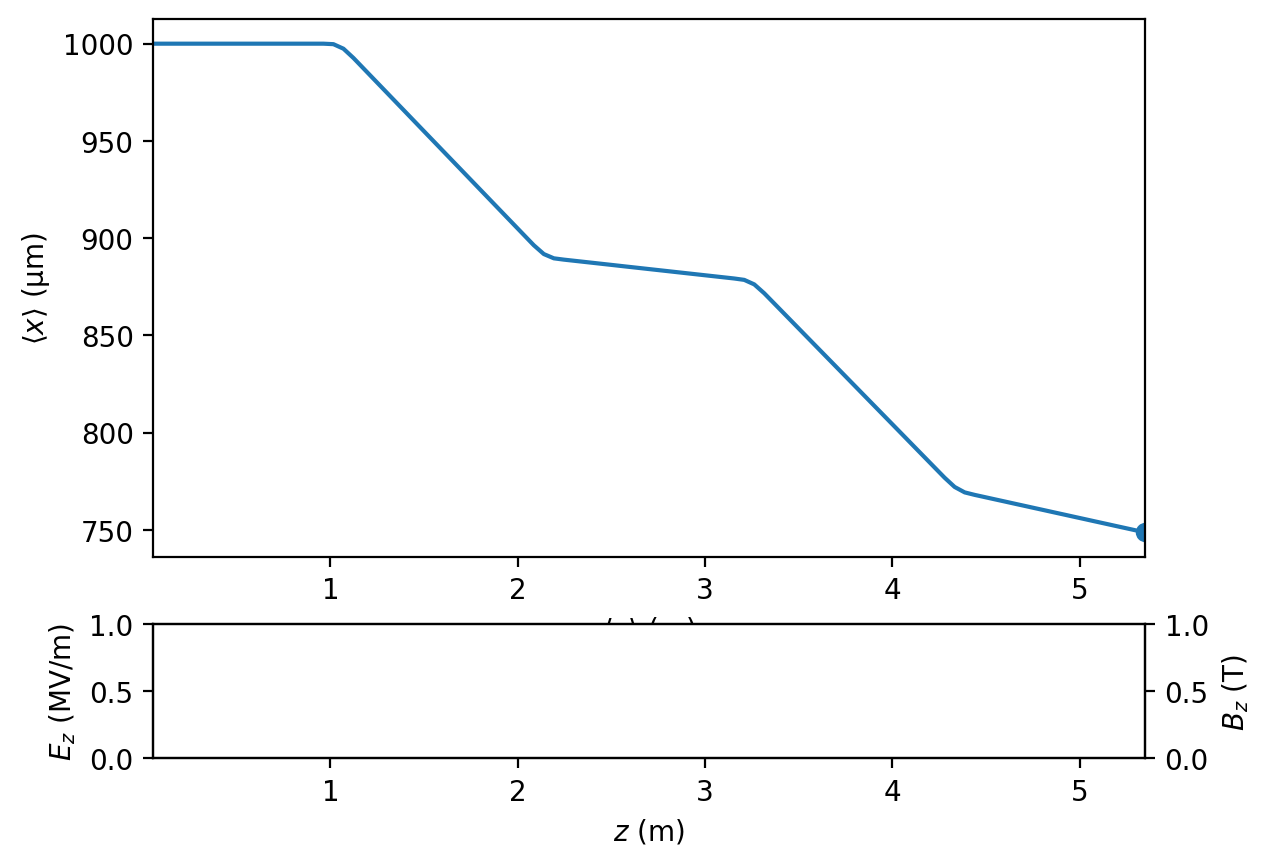

In [5]:
A.plot('mean_x')

## Compare

Text(0, 0.5, '$x$ (mm)')

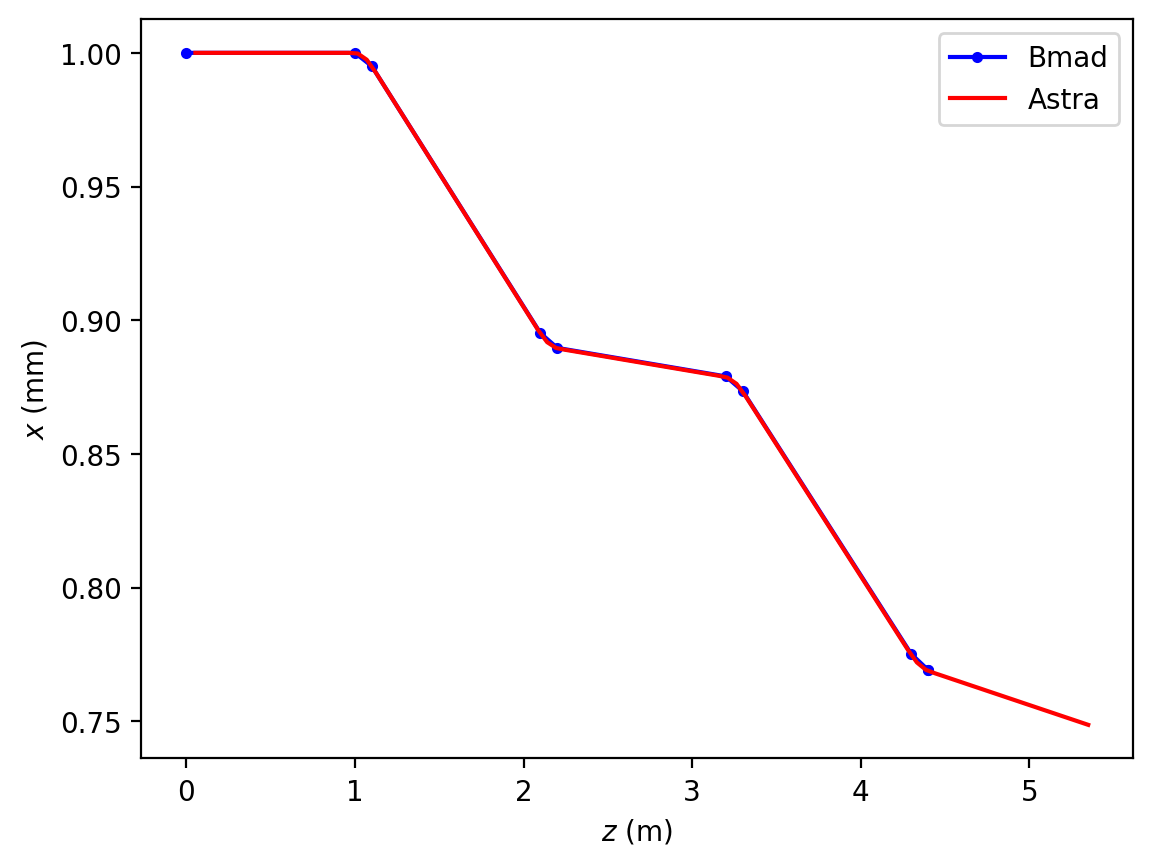

In [6]:
s1 = tao.lat_list('*', 'ele.s')
x1 = tao.lat_list('*', 'orbit.vec.1')

z2 = A.stat('mean_z')
x2 = A.stat('mean_x')

fix, ax = plt.subplots()
ax.plot(s1, x1*1e3, marker='.', label='Bmad', color='blue')
ax.plot(z2, x2*1e3,  label='Astra', color='red')
plt.legend()
ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'$x$ (mm)')

## Cleanup

In [7]:
import os
os.remove(LATFILE)